In [7]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from matplotlib import rcParams
import pandas as pd
import seaborn as sns

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Helvetica']
rcParams['font.size'] = 7
# rcParams['pdf.fonttype'] = 42
# rcParams['ps.fonttype'] = 42
# rcParams['svg.fonttype'] = 'none'


path_figures=Path().cwd().parent.parent/"figures"
path_figures.mkdir(parents=True, exist_ok=True)
path_benchmark_data=Path.cwd().parent.parent/"benchmark_for_test"
path_benchmark_data.mkdir(parents=True, exist_ok=True)

In [8]:
step="update"

library_size=1_000_000
add_size=1_000_000


ion_mode=[-1,1]

mass_per_block=[0.05, 0.1, 0.5, 1]


In [9]:

df=[]
for mass in mass_per_block:
    data={"library_number":library_size,"add_size":add_size, "step":step, "mass_per_block":mass}
    for charge in ion_mode:
        path_benchmark_specific_data_dynamic=path_benchmark_data/f"dynamic_fast_update_{charge}_{add_size}_added_to_{library_size}_compare_time_{step}_step_options_{mass}_mass_per_block.txt"
        
        with open(path_benchmark_specific_data_dynamic,"r") as f:
            dynamic=float(f.readline().strip())
            
        data["dynamic_entropy_search(fast_update)"]=dynamic
        data["charge"]=charge
        df.append(pd.DataFrame([data]))
            
df=pd.concat(df)
df


,library_number,add_size,step,mass_per_block,dynamic_entropy_search(fast_update),charge
0,1000000,1000000,update,0.05,30.167522,-1
0,1000000,1000000,update,0.05,47.396696,1
0,1000000,1000000,update,0.10,29.976941,-1
0,1000000,1000000,update,0.10,48.116925,1
0,1000000,1000000,update,0.50,30.393492,-1
0,1000000,1000000,update,0.50,47.452928,1
0,1000000,1000000,update,1.00,30.114136,-1
0,1000000,1000000,update,1.00,48.068100,1


In [10]:

df_data = df[["mass_per_block", 
              "charge",
            "dynamic_entropy_search(fast_update)", 
            ]]

df_melted=df_data.melt(id_vars=["charge", "mass_per_block"], var_name="type", value_name="time")
df_melted       


,charge,mass_per_block,type,time
0,-1,0.05,dynamic_entropy_search(fast_update),30.167522
1,1,0.05,dynamic_entropy_search(fast_update),47.396696
2,-1,0.10,dynamic_entropy_search(fast_update),29.976941
3,1,0.10,dynamic_entropy_search(fast_update),48.116925
4,-1,0.50,dynamic_entropy_search(fast_update),30.393492
5,1,0.50,dynamic_entropy_search(fast_update),47.452928
6,-1,1.00,dynamic_entropy_search(fast_update),30.114136
7,1,1.00,dynamic_entropy_search(fast_update),48.068100


/tmp/ipykernel_854834/2168070445.py:20: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  sns.barplot(x="mass_per_block", y="time", hue="type", data=df_charge,


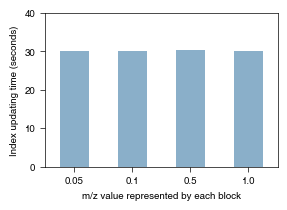

In [ ]:
charge=-1
df_charge=df_melted[df_melted["charge"]==charge]
# Plotting
color_palette_set2 = sns.color_palette("Set3", 12)
color_palette={
    "dynamic_entropy_search(fast_update)": color_palette_set2[4],
    
}
plt.figure(figsize=(3, 2))

ax = plt.gca()

for spine in ax.spines.values():
    spine.set_linewidth(0.4)  

ax.tick_params(axis='both', 
               which='both',
               width=0.4,
               )
     
sns.barplot(x="mass_per_block", y="time", hue="type", data=df_charge, 
            palette=color_palette, legend=False, width=0.5, errwidth=0)


# Set y-axis title
plt.ylabel(f"Index updating time (seconds)")
plt.ylim(top=40)

if charge==-1:
    mode="-"
elif charge==1:
    mode='+'
plt.xlabel(f"m/z value represented by each block")


# Save figure
plt.savefig(path_figures / f"compare_time_different_mass_{step}_step_{charge}_options_mass_per_block.svg", bbox_inches="tight", dpi=1200)

/tmp/ipykernel_854834/421586260.py:20: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  sns.barplot(x="mass_per_block", y="time", hue="type", data=df_charge,


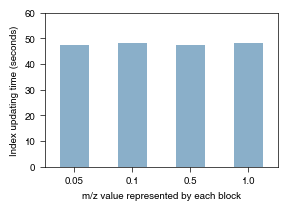

In [12]:
charge=1
df_charge=df_melted[df_melted["charge"]==charge]
# Plotting
color_palette_set2 = sns.color_palette("Set3", 12)
color_palette={
    "dynamic_entropy_search(fast_update)": color_palette_set2[4],
    
}
plt.figure(figsize=(3, 2))

ax = plt.gca()

for spine in ax.spines.values():
    spine.set_linewidth(0.5)  

ax.tick_params(axis='both', 
               width=0.5,
               )
       
sns.barplot(x="mass_per_block", y="time", hue="type", data=df_charge, 
            palette=color_palette, legend=False, width=0.5, errwidth=0)


# Set y-axis title
plt.ylabel(f"Index updating time (seconds)")
plt.ylim(top=60)

if charge==-1:
    mode="-"
elif charge==1:
    mode='+'
plt.xlabel(f"m/z value represented by each block")


# Save figure
plt.savefig(path_figures / f"compare_time_different_mass_{step}_step_{charge}_options_mass_per_block.svg", bbox_inches="tight", dpi=1200)